**Reading the iris data from sklearn**

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
X = iris_data.data
y = iris_data.target


**Converting the data into a dataframe to see the first 5 rows in the data**

In [31]:
import pandas as pd
data_x = pd.DataFrame(X)
data_x.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
print(iris_data.target_names)
print(iris_data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**Split the data into train test split**

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.2)

**Implement different algoritms**

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


**Function to compute the metrics**

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
def print_classification_report_for_model(model_name:str, y_pred, labels):
    
    print(f"----{model_name}------- ")
    print(f"Predictions = {y_pred[:5]}")    
    print(classification_report(y_test, y_pred, target_names = labels))

Matplotlib is building the font cache; this may take a moment.


In [150]:
def display_confusion_matrix(y_test, y_pred, labels):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    print(cm_df)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()
    plt.show()

**Train and run predictions for the different models**

True labels: [1 0 2 1 1]
----DecisionTreeClassifier------- 
Predictions = [1 0 2 1 1]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          0
virginica        0           0         11


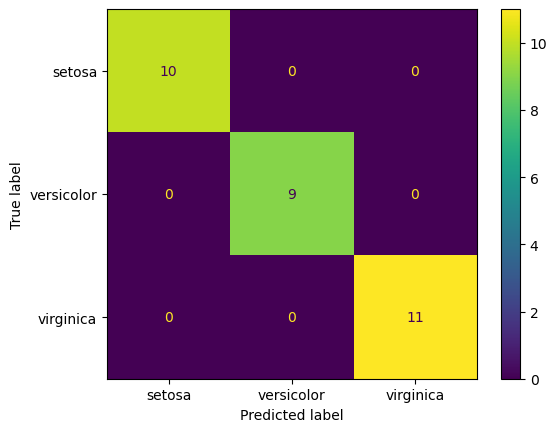

----svm------- 
Predictions = [1 0 2 1 1]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          0
virginica        0           0         11


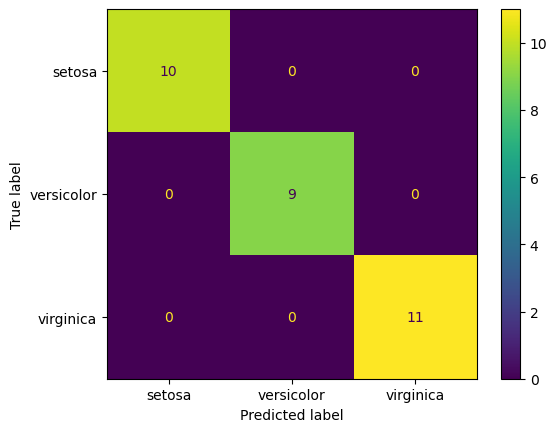

----KNeighboursClassifier------- 
Predictions = [1 0 2 1 1]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

            setosa  versicolor  virginica
setosa          10           0          0
versicolor       0           9          0
virginica        0           0         11


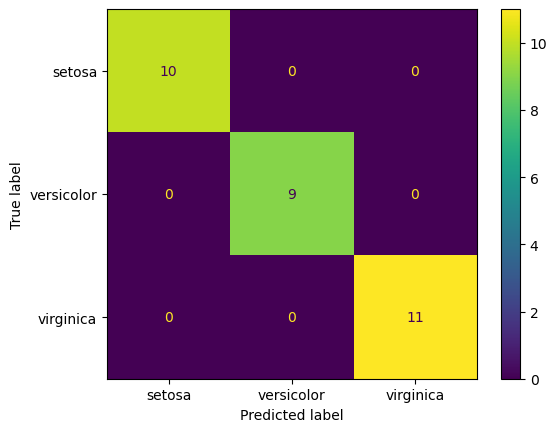

In [151]:
from sklearn.metrics import accuracy_score, confusion_matrix
model_type = [{'model_name':'DecisionTreeClassifier', 'accuracy': 0.0, 'precision':0.0, 'recall':0.0},{'model_name':'svm', 'accuracy': 0.0, 'precision':0.0, 'recall':0.0}, 
              {'model_name':'KNeighboursClassifier', 'accuracy': 0.0, 'precision':0.0, 'recall':0.0}]

print("True labels:", y_test[:5])
labels = iris_data.target_names
for m in model_type:   
    if m['model_name']=='DecisionTreeClassifier':
        model_dtc = DecisionTreeClassifier(random_state = 42)
        model_dtc.fit(X_train,y_train)
        y_pred_dtc = model_dtc.predict(X_test)
        print_classification_report_for_model(m['model_name'], y_pred_dtc, labels)
        display_confusion_matrix(y_test, y_pred_dtc, labels)
    elif m['model_name']=='svm':
        model_svc = svm.SVC()
        model_svc.fit(X_train,y_train)
        y_pred_svc = model_svc.predict(X_test)
        print_classification_report_for_model(m['model_name'], y_pred_svc, labels)
        display_confusion_matrix(y_test, y_pred_svc, labels)
    elif m['model_name']=='KNeighboursClassifier':
        model_knc = KNeighborsClassifier(n_neighbors = 3)
        model_knc.fit(X_train,y_train)
        y_pred_knc = model_knc.predict(X_test)
        print_classification_report_for_model(m['model_name'], y_pred_knc, labels)
        display_confusion_matrix(y_test, y_pred_knc, labels)
